# K-Armed Bandit Experiments Part 2

**TLDR** 

Optimistic Greedy algorithms initialize the $Q(A)$ estimates to be very high. This encourages the model to explore the action space at the very beginning, which leads it to refine its estimates of the value of all actions early on. This leads to generally improved performance in the long term, but at the expense of poor performance in the early stages. 

We also tried the reverse, which we call Pessimistic Greedy, where we set the initial $Q(A)$ estimates to be very low. We find that as predicted this worsens performance across the board.

Generally, sample-averaging is not affected by initial $Q(A)$ estimates while weighted averaging is highly affected by them, which aligns with the mathematics.

**Weighted averaging is biased by the initial Q estimate**

In the previous section we experimented on stochastic and non-stochastic K-bandit problems using $\epsilon$-Greedy bandit algorithms with different configurations: $\epsilon$ and sample-averaging vs weighted averaging. We found the advantage of using $\epsilon$-Greedy search especially in the non-stochastic problem.

However, we fixed the initial values of our $Q(A)$ estimate, which we recall as the estimated value of the expected reward for each action. We recall the formula for sample-averaging as:

$Q_{n+1} = \frac{1}{n} \sum_i^n{R_i}$

Meanwhile, weighted averaging follows an exponentially decaying average:

$Q_{n+1} = (1-\alpha)^n Q_1 + \sum_i^n{\alpha (1-\alpha)^{n-i}R_i}$

Note that for weighted averaging, the first term depends on the initial $Q$ estimate, $Q1$. This term is not present in the $Q$ update for sample-averaging. This means that weighted averaging is biased by the initial $Q$ estimate while sample-averaging is not. This tells us that by changing the initial values of $Q$, we may change the performance of the algorithms using weighted averaging!

**Optimistic Greedy**

We can set the initial $Q$ values to be a high number. We can imagine that by doing this, we encourage more exploration in the first few timesteps, instead of waiting for the $\epsilon$ probability to explore different actions. By encouraging initial exploration, we hope to improve our estimates of $Q(A)$ for each action, in order to decide better. 

The downside is we may experience worse performance in the early stages due to the lost opportunity to exploit more certain actions as well as the risk of selecting more actions with lower true returns. However, we expect that by quickly refining our estimates of $Q(A)$, we can get higher returns in the long term.

**Pessimistic Greedy?**

What will happen if we make the initial $Q$ estimates very low? Intuitively, we should get initially poor performance due to exploitation of poor actions which will still have higher reward than the initial $Q$ estimate. However, in the long term, we expect that the performance will improve due to the bandit adjusting its estimates.

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from scripts.k_armbed_bandit.functions import *

import warnings
warnings.filterwarnings("ignore")

## Experiments

We summarize below our experiment parameters. There are `k_arms` arms or distributions of rewards. Each game has `steps` timesteps. For our analysis we run `n_trials` trials or independent runs of the game, the results of which we average. The standard deviation for sampling how much we change the means of the K reward distributions for the non-stationary problem is some value `q_delta_std`.

In [3]:
k_arms = 10 # number of levers / arms
steps = 2000 # count steps in an episode
n_trials = 500 # number of independent runs/trials
q_delta_std = 0.1 # standard deviation of the Gaussian used for random walk on the true q() values

### Optimistic Greedy

#### Stationary Problem
Below is an example of K randomly generated distributions of rewards for the K-armed bandit problem with fixed reward distributions.

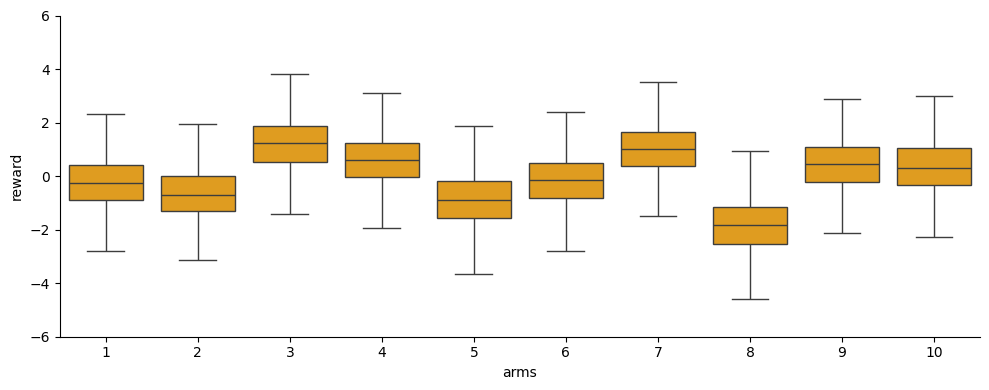

In [4]:
def animate(iter):
    global q_mu

    # plot
    ax.clear()
    ax.set_xticks(range(k_arms), range(1, k_arms+1))
    ax.set_xlabel("arms")
    ax.set_ylabel("reward")
    ax.set_ylim(-6, 6)
    # ax.set_title(f"Iter {iter}")
    
    viz_r_dist(k_arms, q_mu, N=1000, ax=ax)
    sns.despine()    
    plt.tight_layout()

    # random walk
    q_mu = random_walk_q(q_mu, std=q_delta_std)    
    
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
q_mu = init_q(k=k_arms, std=1)    
animate(1)

(4, 1.2282247456226814) (9, 2.0812750112005625) (2, 0.11587112788246479) (8, -0.5869498877063021) (7, 0.8349629338408326)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 2. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 2. 1. 1. 2.]
 [1. 1. 1. 1. 2. 1. 2. 1. 1. 2.]
 [1. 1. 1. 1. 2. 1. 2. 2. 1. 2.]
 [2. 1. 1. 1. 2. 1. 2. 2. 1. 2.]]
[[5.         5.         5.         5.         5.         5.
  5.         5.         5.         5.        ]
 [5.         5.         5.         5.         4.62282247 5.
  5.         5.         5.         5.        ]
 [5.         5.         5.         5.         4.62282247 5.
  5.         5.         5.         4.7081275 ]
 [5.         5.         4.51158711 5.         4.62282247 5.
 

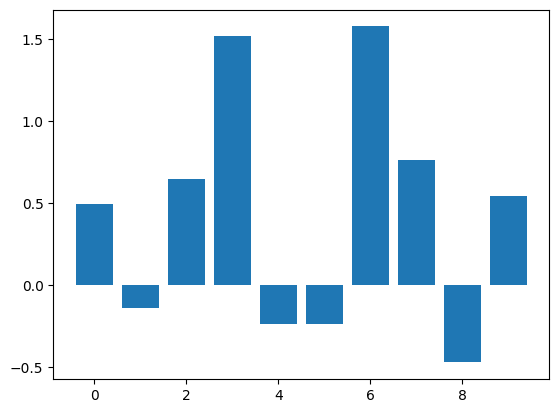

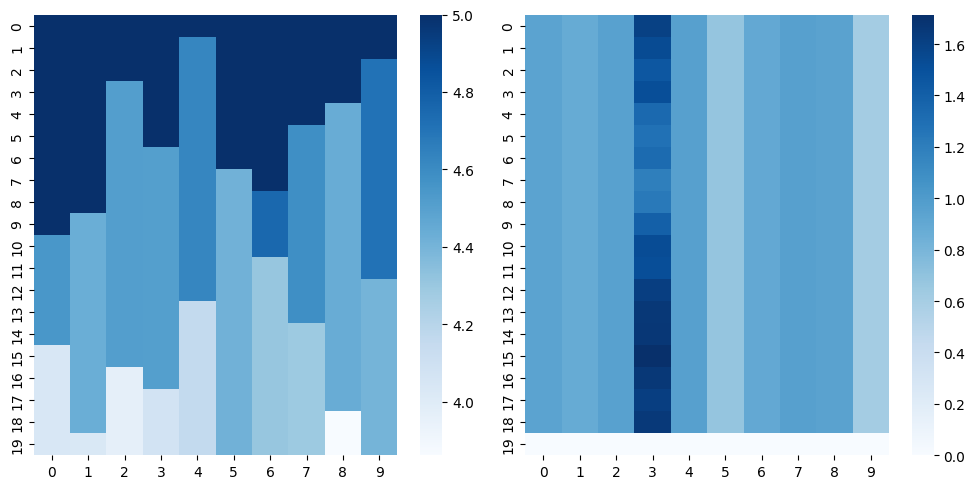

In [5]:
# debug
Q_init = [5] * k_arms
stationary_q = True
step_size = 0.1
trial = 42

bandit = Bandit(k_arms, eps=0.,
                Q_init=Q_init,
                stationary_q=stationary_q, 
                q_delta_std=q_delta_std,
                steps=steps, step_size=step_size,
                random_seed=trial,
                )
bandit.run_bandit()


# investigate
plt.bar(range(len(bandit.q_mu)), bandit.q_mu)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(bandit.Q_tracker[:20], cmap='Blues', ax=axs[0])
sns.heatmap(bandit.Q_tracker[-20:], cmap='Blues', ax=axs[1])
plt.tight_layout()

print(*zip(bandit.A_tracker, bandit.R_tracker[:5]))
print(bandit.N_tracker[:15])
print(bandit.Q_tracker[:15])

For this stationary reward problem, we show to the left below the average reward over timesteps for the different algorithms. Here `eps=0` means Greedy, and `eps=0.1` means Epsilon-Greedy. `step_size = 1/N` means the algorithm uses sample-averaging, while `step_size = 0.1` means the algorithm uses weighted averaging with $\alpha = 0.1$ 

To the right, we show the proportion among all trials that the optimal action (corresponding to the highest true expected return $q(a)$) was selected.

We show the learning curves and proportion of optimal action for different combinations of:
* Initial Q estimate, e.g. all 0s or all 5s (optimistic)
* $\epsilon$ value, 0 or 0.1
* step sizes or learning rates, 0.1 or $1/N(A_t)$ where $N(A_t)$ is the number of times action $A$ was selected at timestep $t$

**Observations**

* We observe that for this stationary reward problem, the setup that yielded the highest return and percent optimal actions is Optimistic Greedy (pink) having high initial Q and using weighted average with $\alpha=0.1$
* Models that used sample averaging fared rather poorly
* While Optimistic Greedy increases rewards and percent optimal actions in the longer term, we note that the performance is initially poor relative to other configurations. Intuitively, this is likely due to the initial exploration stage which is encouraged by setting the initial Q values to be very high
* We note that sample-averaging (step size = $1/N$) does not seem to be highly affected by optimistic initial Q. This aligns with our intuition that sample-averaging is not biased by the initial Q, unlike weighted-averaging which has the extra term pertaining to the initial values Q1.

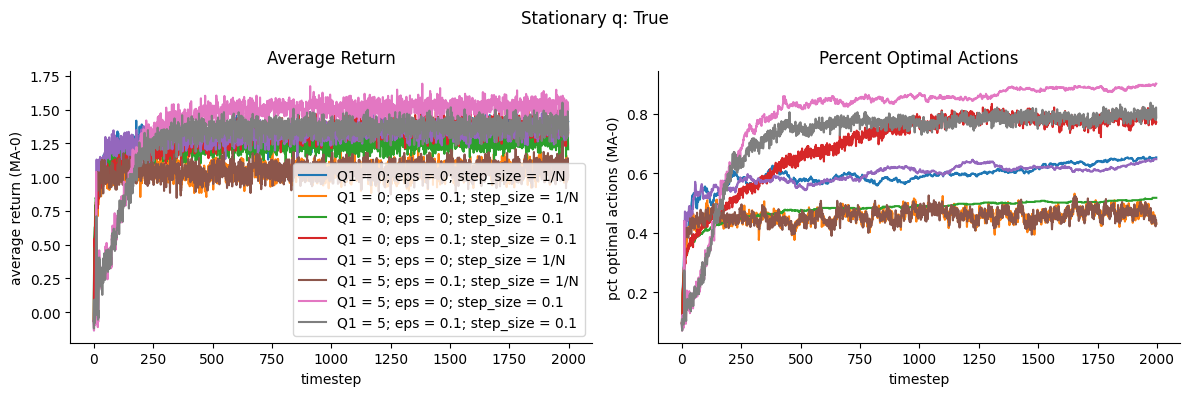

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=False)    

w = 0
stationary_q = True
Q_init_vals = [[0] * k_arms, [5] * k_arms]
step_sizes = ["1/N", 0.1]
eps_list = [0, 0.1]

for Q_init in Q_init_vals:
    for step_size in step_sizes:    
        for eps in eps_list:
            label = f'Q1 = {Q_init[0]}; eps = {eps}; step_size = {step_size}'
            plot_learning_curves(stationary_q, Q_init, q_delta_std,
                                k_arms, n_trials, steps, step_size, eps, w, 
                                axs, label=label)

#### Non-Stationary Problem
We show in the animation below an example of K randomly generated distributions that gradually change means over the course of the game.

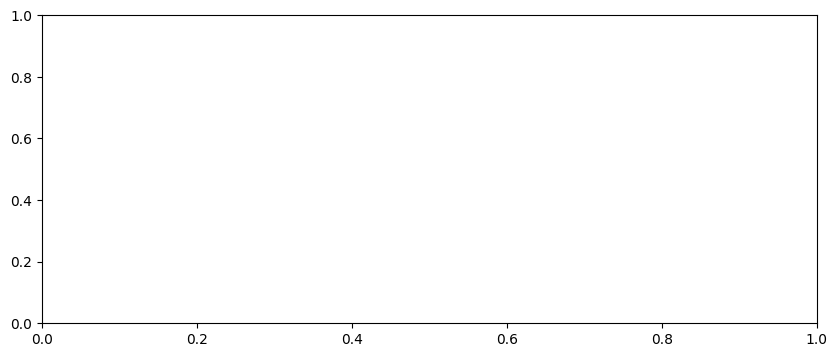

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

In [7]:
anim = animation.FuncAnimation(fig,
                               animate,
                               frames=100, 
                               interval=1)
HTML(anim.to_jshtml(fps=10))

<Figure size 640x480 with 0 Axes>

We show below the results for the stationary reward problem.

**Observations**
* The highest performing algorithms use sample averaging scheme which puts equal weight to all observed rewards. This is not intuitive since for changing distributions it may seem we may want to put more importance on more recent rewards hence weighted averaging is expected to perform better, which isn't the case here.
* The highest value is achieved by Optimistic Epsilon-Greedy with sample averaging method.
* Generally, it seems it's not easy to infer the performance of these k-bandit algorithms based on its configuration and the environment. What's intuitive does not necessarily happen.

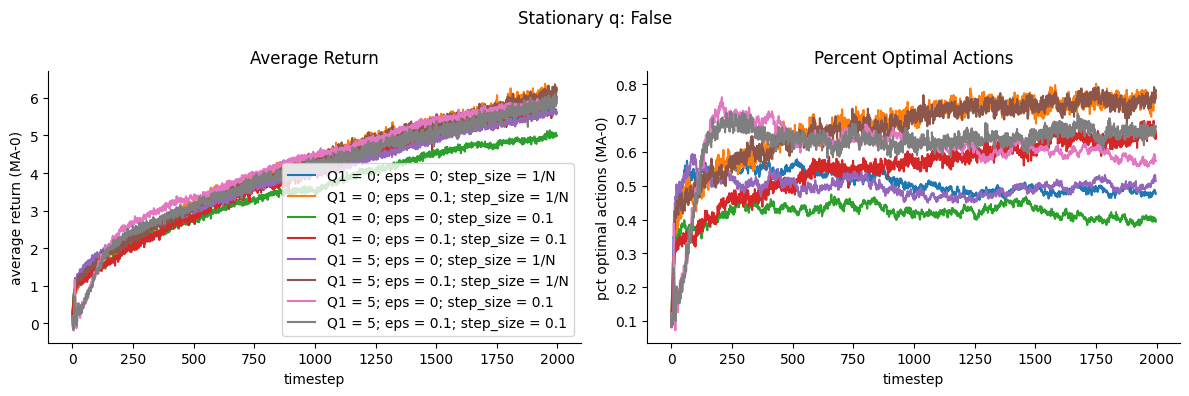

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=False)    

w = 0
stationary_q = False
Q_init_vals = [[0] * k_arms, [5] * k_arms]
step_sizes = ["1/N", 0.1]
eps_list = [0, 0.1]

for Q_init in Q_init_vals:
    for step_size in step_sizes:    
        for eps in eps_list:
            label = f'Q1 = {Q_init[0]}; eps = {eps}; step_size = {step_size}'
            plot_learning_curves(stationary_q, Q_init, q_delta_std,
                                k_arms, n_trials, steps, step_size, eps, w, 
                                axs, label=label)

### Pessimistic Greedy?

What will happen if we make the initial $Q$ estimates very low? Intuitively, we should get initially poor performance due to exploitation of poor actions which will still have higher reward than the initial $Q$ estimate. However, in the long term, we expect that the performance will improve due to the bandit adjusting its estimates.

**Observations**
* Based on the results below, pessimistic greedy does worsen performance across the board as expected
* Ultimately, we really see no point in doing this because this is worse than simply setting all $Q$ to 0!

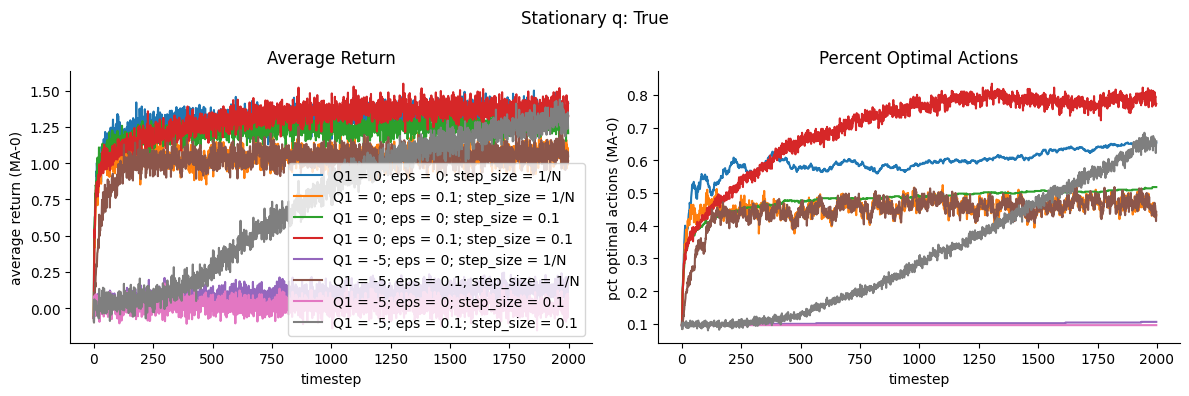

In [6]:
# pessimistic greedy, we expect bad performance due to explotation of more bad actions!
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=False)    

w = 0
stationary_q = True
Q_init_vals = [[0] * k_arms, [-5] * k_arms]
step_sizes = ["1/N", 0.1]
eps_list = [0, 0.1]

for Q_init in Q_init_vals:
    for step_size in step_sizes:    
        for eps in eps_list:
            label = f'Q1 = {Q_init[0]}; eps = {eps}; step_size = {step_size}'
            plot_learning_curves(stationary_q, Q_init, q_delta_std,
                                k_arms, n_trials, steps, step_size, eps, w, 
                                axs, label=label)